In [6]:
from IPython.display import display, Markdown
from random import randint
from io import StringIO
from vectors import dot


def generate_random_matrix(rows: int, cols: int, min=-2, max=2):
    return tuple(
        tuple(randint(min, max) for _ in range(cols)) for _ in range(rows))


def latex_matrix(m: tuple[tuple[int]]) -> str:
    buffer = StringIO()
    print(r"\begin{pmatrix}", file=buffer)
    for row in m:
        if type(row) == int:
            # its a vector
            print(f"{row}" + r"\\", file=buffer)
        else:
            print(" & ".join([str(x) for x in row]) + r"\\", file=buffer)
    print(r"\end{pmatrix}", file=buffer)
    return buffer.getvalue()


def print_matrix(m: tuple[tuple[int]], label: str | None = None):
    lm = latex_matrix(m)
    if label:
        display(Markdown(f'**{label}**: $ {lm} $'))
    else:
        display(Markdown(f"$$ {lm} $$"))

def print_matrixes(*matrixes: list[tuple[tuple[int]]], label: str | None = None):
    lms = " ".join(['$ ' + latex_matrix(m) + ' $' for m in matrixes])
    if label:
        display(Markdown(f'**{label}**: {lms}'))
    else:
        display(Markdown(lms))

def matrix_multiply(a, b):
    return tuple(tuple(dot(row, col) for col in zip(*b)) for row in a)


In [7]:
matrix_pairs = []
for _ in range(5):
    m1 = generate_random_matrix(3, 3, min=1, max=9)
    m2 = generate_random_matrix(3, 3)
    display(Markdown(f"$ {latex_matrix(m1)} {latex_matrix(m2)} $"))
    matrix_pairs.append((m1, m2))

$ \begin{pmatrix}
2 & 2 & 2\\
4 & 6 & 4\\
5 & 2 & 8\\
\end{pmatrix}
 \begin{pmatrix}
1 & 1 & -1\\
2 & 0 & 2\\
1 & 0 & 2\\
\end{pmatrix}
 $

$ \begin{pmatrix}
9 & 9 & 5\\
3 & 7 & 4\\
8 & 1 & 9\\
\end{pmatrix}
 \begin{pmatrix}
2 & -1 & 1\\
-2 & 0 & 0\\
2 & -2 & 1\\
\end{pmatrix}
 $

$ \begin{pmatrix}
5 & 5 & 8\\
3 & 3 & 4\\
6 & 8 & 3\\
\end{pmatrix}
 \begin{pmatrix}
2 & -1 & 2\\
-2 & -2 & 1\\
1 & 1 & -2\\
\end{pmatrix}
 $

$ \begin{pmatrix}
4 & 7 & 8\\
2 & 4 & 9\\
4 & 6 & 5\\
\end{pmatrix}
 \begin{pmatrix}
0 & 1 & 0\\
-1 & 1 & -1\\
0 & -1 & 2\\
\end{pmatrix}
 $

$ \begin{pmatrix}
7 & 7 & 3\\
4 & 3 & 5\\
3 & 3 & 8\\
\end{pmatrix}
 \begin{pmatrix}
1 & -2 & 1\\
2 & -1 & -1\\
-2 & -2 & 2\\
\end{pmatrix}
 $

In [8]:
m1, m2 = matrix_pairs[4]
print_matrix(matrix_multiply(m2, m1), "result")

**result**: $ \begin{pmatrix}
2 & 4 & 1\\
7 & 8 & -7\\
-16 & -14 & 0\\
\end{pmatrix}
 $

In [9]:
m1, m2 = matrix_pairs[4]
print_matrix(matrix_multiply(m1, m2), "result")

**result**: $ \begin{pmatrix}
15 & -27 & 6\\
0 & -21 & 11\\
-7 & -25 & 16\\
\end{pmatrix}
 $

In [10]:
m1 = (
    (1, -2, 1),
    (-1, 2, 2),
    (2, 2, 1)
)
m2 = (
    (-2, -2, 2),
    (1, 1, 1),
    (-1, 1, -2)
)

result = matrix_multiply(m1, m2)
print_matrix(result, "Result")

**Result**: $ \begin{pmatrix}
-5 & -3 & -2\\
2 & 6 & -4\\
-3 & -1 & 4\\
\end{pmatrix}
 $

In [11]:
from vectors import linear_combination


def multiply_matrix_vector(matrix, vector):
    return linear_combination(vector, *zip(*matrix))

In [12]:
def multiply_matrix_vector1(matrix: tuple[tuple[int]], vector: tuple[int]):
    return [sum(a * x for a, x in zip(vector, row))
            for row in matrix]

def multiply_matrix_vector2(matrix: tuple[tuple[int]], vector: tuple[int]):
    return [dot(row, vector) for row in matrix]


In [13]:
v = (1,2,3)
m1 = (
    (1, -2, 1),
    (-1, 2, 2),
    (2, 2, 1)
)

result1 = multiply_matrix_vector(m1, v)
result2 = multiply_matrix_vector1(m1, v)
result3 = multiply_matrix_vector2(m1, v)
print_matrixes(result1, result2, result3)

$ \begin{pmatrix}
0\\
9\\
9\\
\end{pmatrix}
 $ $ \begin{pmatrix}
0\\
9\\
9\\
\end{pmatrix}
 $ $ \begin{pmatrix}
0\\
9\\
9\\
\end{pmatrix}
 $

In [14]:
def infer_matrix(n, transformation):
    # transformation is a function that transforms the vector
    # to infer the matrix we need to run the transformation on each of n unit vectors
    return list(zip(*[transformation([1 if i == dim else 0 for i in range(n)]) for dim in range(n)]))

In [15]:
from transforms import rotate_z_by
from math import *


print_matrix(infer_matrix(3, rotate_z_by(pi/2)))

$$ \begin{pmatrix}
6.123233995736766e-17 & -1.0 & 0.0\\
1.0 & 1.2246467991473532e-16 & 0.0\\
0 & 0 & 1\\
\end{pmatrix}
 $$

In [16]:
from vectors import rotate2d
from functools import partial

print_matrix(infer_matrix(2, partial(rotate2d, pi/2)))

$$ \begin{pmatrix}
6.123233995736766e-17 & -1.0\\
1.0 & 1.2246467991473532e-16\\
\end{pmatrix}
 $$

In [17]:
def matrix_power(power,m):
    n = m
    for p in range(1, power):
        n = matrix_multiply(n, m)
    return n




In [18]:
matrix_power(2, ())




()

In [19]:
print_matrix(matrix_multiply(((1,2,), (3,4)), ((0, -1), (1,0))))

$$ \begin{pmatrix}
2 & -1\\
4 & -3\\
\end{pmatrix}
 $$

In [20]:
def transpose(m):
    return list(zip(*m))

In [21]:
m = (
    (1,2),
    (3,4)
)
print_matrix(transpose(m))

$$ \begin{pmatrix}
1 & 3\\
2 & 4\\
\end{pmatrix}
 $$

In [22]:
def project2d(v: tuple[int]):
    return v[:-1]



In [23]:
print_matrix(infer_matrix(3, project2d))

$$ \begin{pmatrix}
1 & 0 & 0\\
0 & 1 & 0\\
\end{pmatrix}
 $$

In [24]:
vs = 'lemons'
v = tuple(ord(l) for l in vs)
vs2 = 'solemn'
v2 = tuple(ord(l) for l in vs2)

m = (
    (0, 0, 0, 0, 0, 1),
    (0, 0, 0, 1, 0, 0),
    (1, 0, 0, 0, 0, 0),
    (0, 1, 0, 0, 0, 0),
    (0, 0, 1, 0, 0, 0),
    (0, 0, 0, 0, 1, 0),

)
result = multiply_matrix_vector(m, v)
print_matrixes(v2, result)

$ \begin{pmatrix}
115\\
111\\
108\\
101\\
109\\
110\\
\end{pmatrix}
 $ $ \begin{pmatrix}
115\\
111\\
108\\
101\\
109\\
110\\
\end{pmatrix}
 $

**Mini-project:** Find a 3x3 matrix that rotates a 2D figure in the plane $z = 1$ by $45^\circ$, decreases its size by a factor of 2, and translates it by the vector (2,2). Demonstrate that it works by applying it to the vertices of the dinosaur.

In [25]:
from draw3d import draw3d, Points3D, Segment3D

def polygon_segments_3d(points,color='blue'):
    count = len(points)
    return [Segment3D(points[i], points[(i+1) % count],color=color) for i in range(0,count)]

In [26]:

from vector_drawing import *

dino_vectors = [(6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4),
    (-5,3), (-5,2), (-2,2), (-5,1), (-4,0), (-2,1), (-1,0), (0,-3),
    (-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1)
]

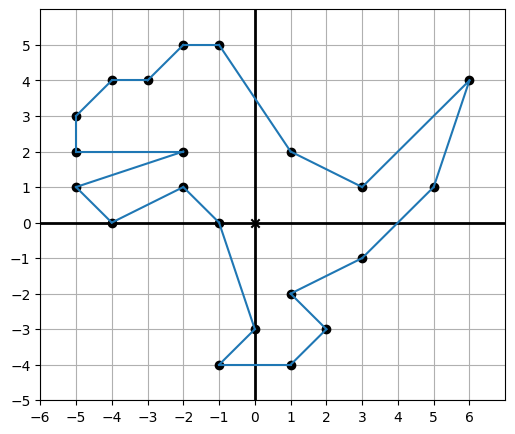

In [27]:
draw(
    Points(*dino_vectors),
    Polygon(*dino_vectors)
)

$$ \begin{pmatrix}
0.3535533905932738 & -0.35355339059327373 & 2\\
0.35355339059327373 & 0.3535533905932738 & 2\\
0 & 0 & 1\\
\end{pmatrix}
 $$

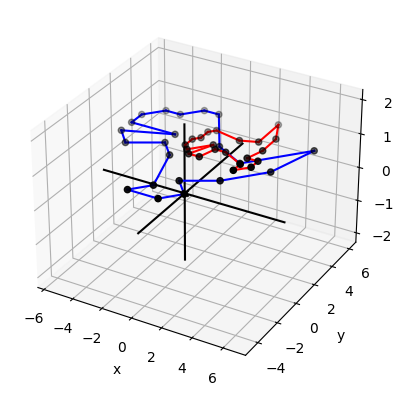

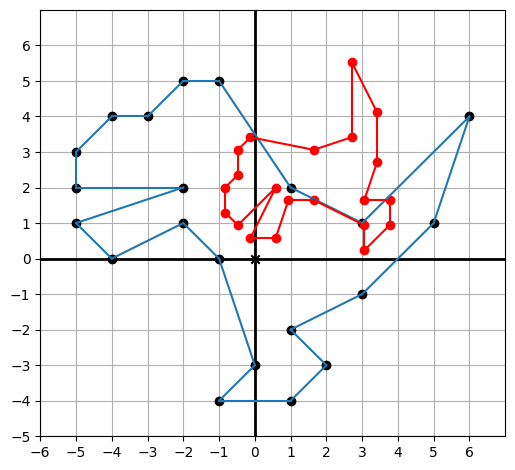

In [62]:
from functools import partial
from vectors import rotate2d, scale
from itertools import zip_longest
import math

m0 = (
    (1, 0, 0),
    (0, 1, 0),
    (0, 0, 1)
)
mtranslate = (
    (1, 0, 2),
    (0, 1, 2),
    (0, 0, 1)
)

rotate45 = partial(rotate2d, math.pi/4)
rm = infer_matrix(2, rotate45)
scale05 = partial(scale, 0.5)
sm = infer_matrix(2, scale05)
smrm = matrix_multiply(rm, sm)

result = tuple((*lhs, rhs[2]) if lhs else rhs for lhs, rhs in zip_longest(smrm, mtranslate))
print_matrix(result)

dino_3d = tuple((x, y, 1) for x, y in dino_vectors)

translated = tuple(multiply_matrix_vector(result, v) for v in dino_3d)
draw3d(
    Points3D(*dino_3d),
    *polygon_segments_3d(dino_3d),
    Points3D(*translated),
    *polygon_segments_3d(translated, color='red')
)
m2 = (
    (1, 0),
    (0, 1)
)
translated2d = tuple(multiply_matrix_vector(m2, v) for v in translated)
draw(
    Points(*dino_vectors),
    Polygon(*dino_vectors),
    Points(*translated2d, color='red'),
    Polygon(*translated2d, color='red')
)



Only rotate and scale

$$ \begin{pmatrix}
0.3535533905932738 & -0.35355339059327373 & 0\\
0.35355339059327373 & 0.3535533905932738 & 0\\
0 & 0 & 1\\
\end{pmatrix}
 $$

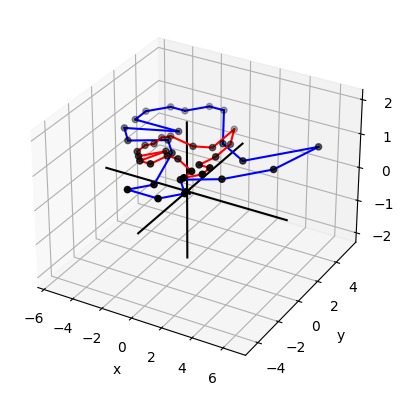

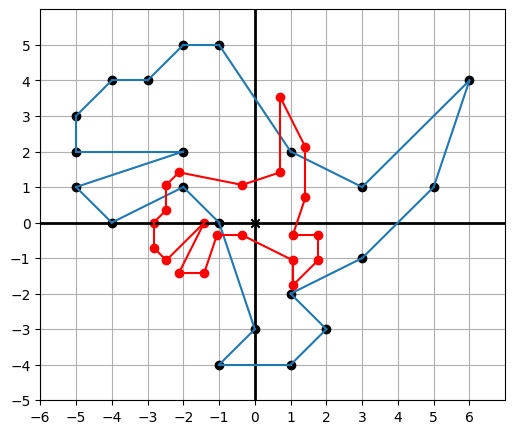

In [ ]:
from functools import partial
from vectors import rotate2d, scale
from itertools import zip_longest
import math

m0 = ((1, 0, 0), (0, 1, 0), (0, 0, 1))
mtranslate = ((1, 0, 2), (0, 1, 2), (0, 0, 1))

rotate45 = partial(rotate2d, math.pi / 4)
rm = infer_matrix(2, rotate45)
scale05 = partial(scale, 0.5)
sm = infer_matrix(2, scale05)
smrm = matrix_multiply(rm, sm)

result = tuple((*lhs, rhs[2]) if lhs else rhs
               for lhs, rhs in zip_longest(smrm, m0))
# result = matrix_multiply(result, mtranslate)
print_matrix(result)

dino_3d = tuple((x, y, 1) for x, y in dino_vectors)

translated = tuple(multiply_matrix_vector(result, v) for v in dino_3d)
draw3d(Points3D(*dino_3d), *polygon_segments_3d(dino_3d),
       Points3D(*translated), *polygon_segments_3d(translated, color='red'))
m2 = ((1, 0), (0, 1))
translated2d = tuple(multiply_matrix_vector(m2, v) for v in translated)
draw(Points(*dino_vectors), Polygon(*dino_vectors),
     Points(*translated2d, color='red'), Polygon(*translated2d, color='red'))


First translate, then rotate and scale

$$ \begin{pmatrix}
0.3535533905932738 & -0.35355339059327373 & 1.1102230246251565e-16\\
0.35355339059327373 & 0.3535533905932738 & 1.414213562373095\\
0 & 0 & 1\\
\end{pmatrix}
 $$

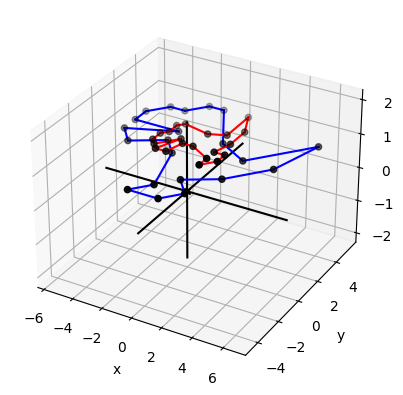

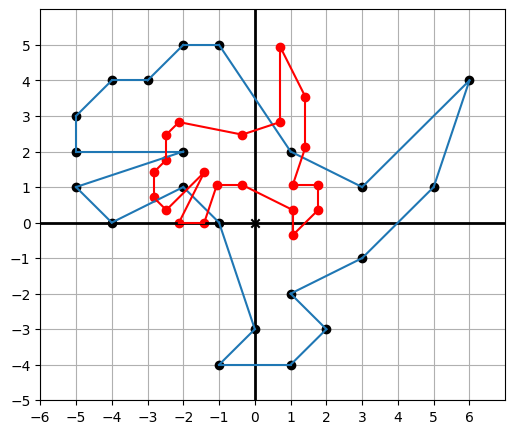

In [67]:
from functools import partial
from vectors import rotate2d, scale
from itertools import zip_longest
import math

m0 = ((1, 0, 0), (0, 1, 0), (0, 0, 1))
mtranslate = ((1, 0, 2), (0, 1, 2), (0, 0, 1))

rotate45 = partial(rotate2d, math.pi / 4)
rm = infer_matrix(2, rotate45)
scale05 = partial(scale, 0.5)
sm = infer_matrix(2, scale05)
smrm = matrix_multiply(rm, sm)

result = tuple((*lhs, rhs[2]) if lhs else rhs
               for lhs, rhs in zip_longest(smrm, m0))
result = matrix_multiply(result, mtranslate)
print_matrix(result)

dino_3d = tuple((x, y, 1) for x, y in dino_vectors)

translated = tuple(multiply_matrix_vector(result, v) for v in dino_3d)
draw3d(Points3D(*dino_3d), *polygon_segments_3d(dino_3d),
       Points3D(*translated), *polygon_segments_3d(translated, color='red'))
m2 = ((1, 0), (0, 1))
translated2d = tuple(multiply_matrix_vector(m2, v) for v in translated)
draw(Points(*dino_vectors), Polygon(*dino_vectors),
     Points(*translated2d, color='red'), Polygon(*translated2d, color='red'))


**Exercise:** Write a function analogous to `translate_3d` called `translate_4d` that uses a 5x5 matrix to translate a 4D vector by another 4D vector. Run an example to show that the coordinates are translated.

In [81]:
def translate4d(translation):
    mt = tuple(
        zip(*(tuple(1 if j == i else 0
               for j in range(0, 5)) if i < 4 else translation + (1,)
              for i in range(0, 5))))
    print_matrix(mt)

    def _translate4d(v4d):
        return multiply_matrix_vector(mt, v4d + (1,))[:-1]
    return _translate4d


myTranslate = translate4d((4, 3, 2, 1))
myTranslate((1, 1, 1, 1))


$$ \begin{pmatrix}
1 & 0 & 0 & 0 & 4\\
0 & 1 & 0 & 0 & 3\\
0 & 0 & 1 & 0 & 2\\
0 & 0 & 0 & 1 & 1\\
0 & 0 & 0 & 0 & 1\\
\end{pmatrix}
 $$

(5, 4, 3, 2)

In [102]:
%matplotlib inline

$$ \begin{pmatrix}
0.3535533905932738 & -0.35355339059327373 & 2\\
0.35355339059327373 & 0.3535533905932738 & 2\\
0 & 0 & 1\\
\end{pmatrix}
 $$

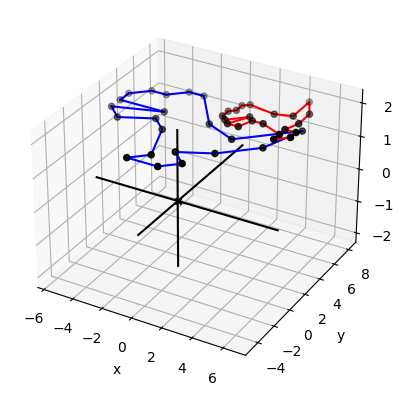

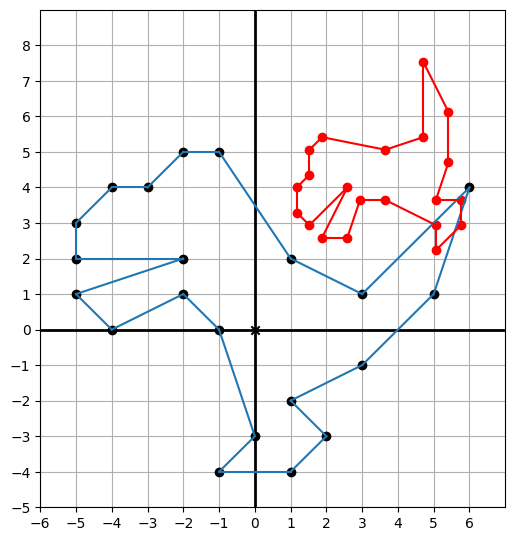

In [105]:

from functools import partial
from vectors import rotate2d, scale
from itertools import zip_longest
import math

m0 = (
    (1, 0, 0),
    (0, 1, 0),
    (0, 0, 1)
)
mtranslate = (
    (1, 0, 2),
    (0, 1, 2),
    (0, 0, 1)
)

rotate45 = partial(rotate2d, math.pi/4)
rm = infer_matrix(2, rotate45)
scale05 = partial(scale, 0.5)
sm = infer_matrix(2, scale05)
smrm = matrix_multiply(rm, sm)

result = tuple((*lhs, rhs[2]) if lhs else rhs for lhs, rhs in zip_longest(smrm, mtranslate))
print_matrix(result)

dino_3d = tuple((x, y, 2) for x, y in dino_vectors)

translated = tuple(multiply_matrix_vector(result, v) for v in dino_3d)
draw3d(
    Points3D(*dino_3d),
    *polygon_segments_3d(dino_3d),
    Points3D(*translated),
    *polygon_segments_3d(translated, color='red')
)
m2 = (
    (1, 0),
    (0, 1)
)
translated2d = tuple(multiply_matrix_vector(m2, v) for v in translated)
draw(
    Points(*dino_vectors),
    Polygon(*dino_vectors),
    Points(*translated2d, color='red'),
    Polygon(*translated2d, color='red')
)

